In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# **UNDERSTANDING DATA AND PRE-PROCESSING**

In [4]:
train.shape

(10683, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**CHECKING FOR NULL VALUES**

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**we can see that Date_of_Journey is a object data type,
 Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
 model will not be able to understand Theses string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.**

In [10]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  train[i]=pd.to_datetime(train[i])

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [11]:
train['Journey_day']=train['Date_of_Journey'].dt.day
train['Journey_month']=train['Date_of_Journey'].dt.month
train['Journey_year']=train['Date_of_Journey'].dt.year

In [12]:
data=train.drop('Date_of_Journey',axis=1)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-02-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-02-09 05:50:00,2021-02-09 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-02-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-02-09 18:05:00,2021-02-09 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-02-09 16:50:00,2021-02-09 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


**as we did with date_of_journey, we do same with dep_time and arrival_time**

In [13]:
data['Dep_Time_Hour']=data['Dep_Time'].dt.hour
data['Dep_Time_Mins']=data['Dep_Time'].dt.minute

In [14]:
data['Arrival_Time_Hour']=data['Arrival_Time'].dt.hour
data['Arrival_Time_Mins']=data['Arrival_Time'].dt.minute

In [15]:
dt=data.drop(['Arrival_Time','Dep_Time'],axis=1)
dt.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [16]:
duration=list(dt['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [17]:
dt['Duration']=duration
dt.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [18]:
def min(x):
    return x.split(' ')[1][0:-1]
def hour(x):
    return x.split(' ')[0][0:-1]
dt['Duration_hours']=dt['Duration'].apply(hour)
dt['Duration_mins']=dt['Duration'].apply(min)

In [19]:
dt.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [20]:
dt.drop('Duration',axis=1,inplace=True)
dt.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Journey_year          int64
Dep_Time_Hour         int64
Dep_Time_Mins         int64
Arrival_Time_Hour     int64
Arrival_Time_Mins     int64
Duration_hours       object
Duration_mins        object
dtype: object

In [21]:
dt['Duration_hours']=dt['Duration_hours'].astype(int)
dt['Duration_mins']=dt['Duration_mins'].astype(int)

In [22]:
dt.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Journey_year          int64
Dep_Time_Hour         int64
Dep_Time_Mins         int64
Arrival_Time_Hour     int64
Arrival_Time_Mins     int64
Duration_hours        int64
Duration_mins         int64
dtype: object

# **CATEGORICAL DATA**

We are using 2 main Encoding Techniques to convert Categorical data into some numerical format                                                                

Nominal data --> data are not in any order --> OneHotEncoder is used in this case                                                                            
Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [23]:
cat_col=[col for col in dt.columns if dt[col].dtype=='O']
cat_col
cont_col=[col for col in dt.columns if dt[col].dtype!='O']
cont_col

categorical=dt[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [24]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## **DATA VISUALIZATION**

AIRLINE VS PRICE

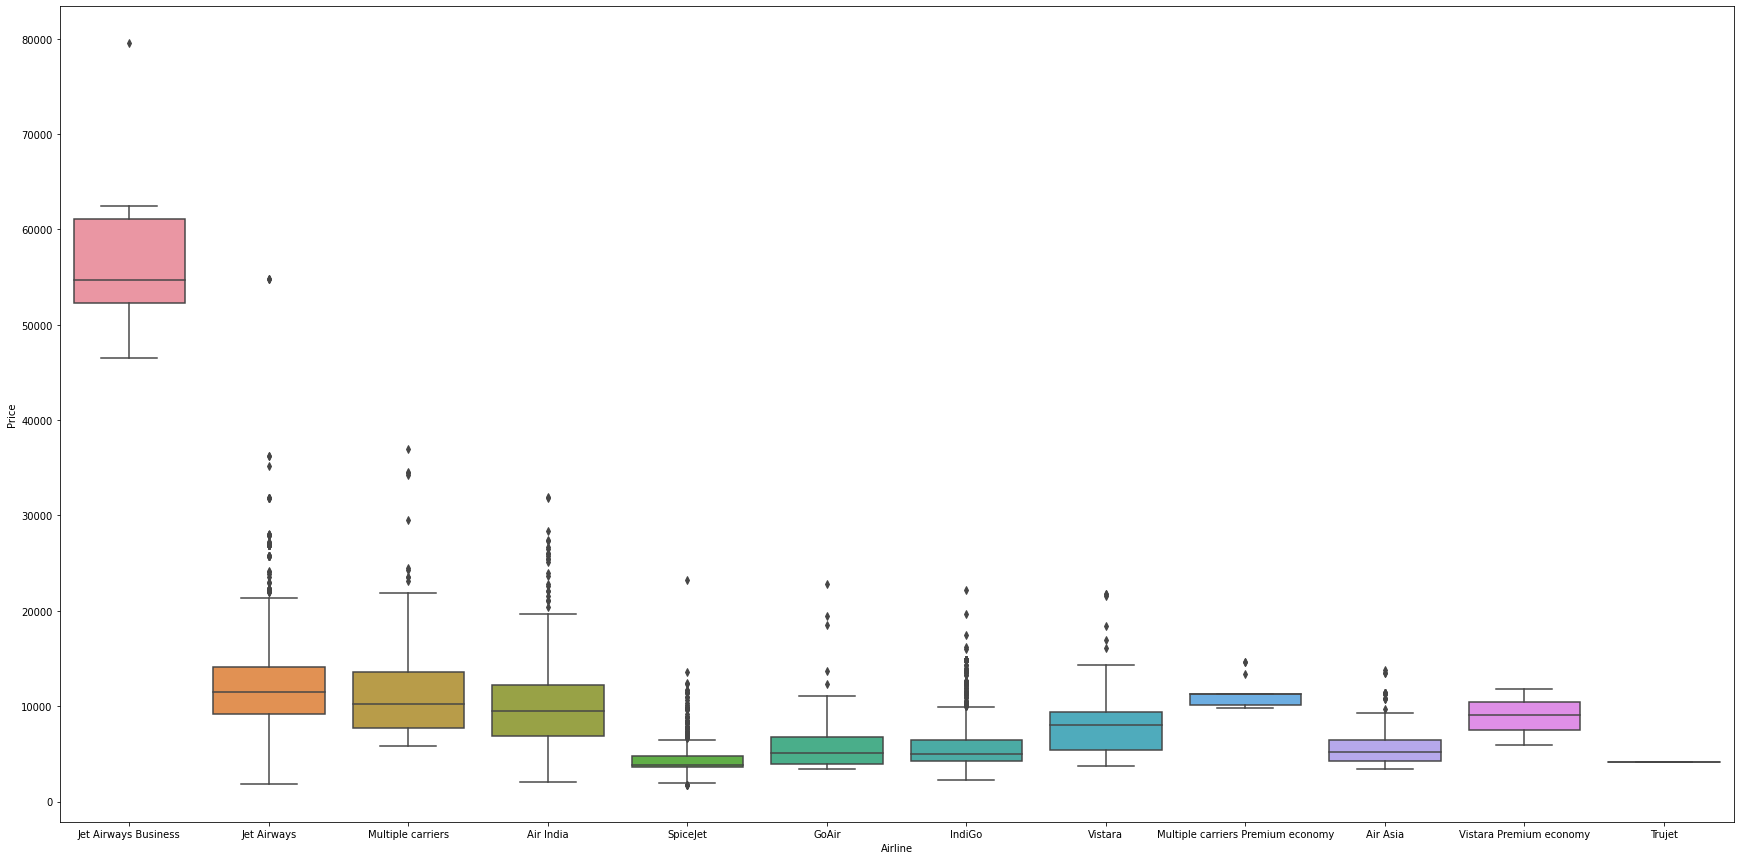

In [25]:
plt.figure(figsize=(30,15))
sns.boxplot(y='Price',x='Airline',data=dt.sort_values('Price',ascending=False))

**CONCLUSION**                                                                  
we can clearly see that **JET AIRWAYS BUSINESS** have highest ticket price, while other all airlines have almost same median.

TOTAL_STOPS VS PRICE

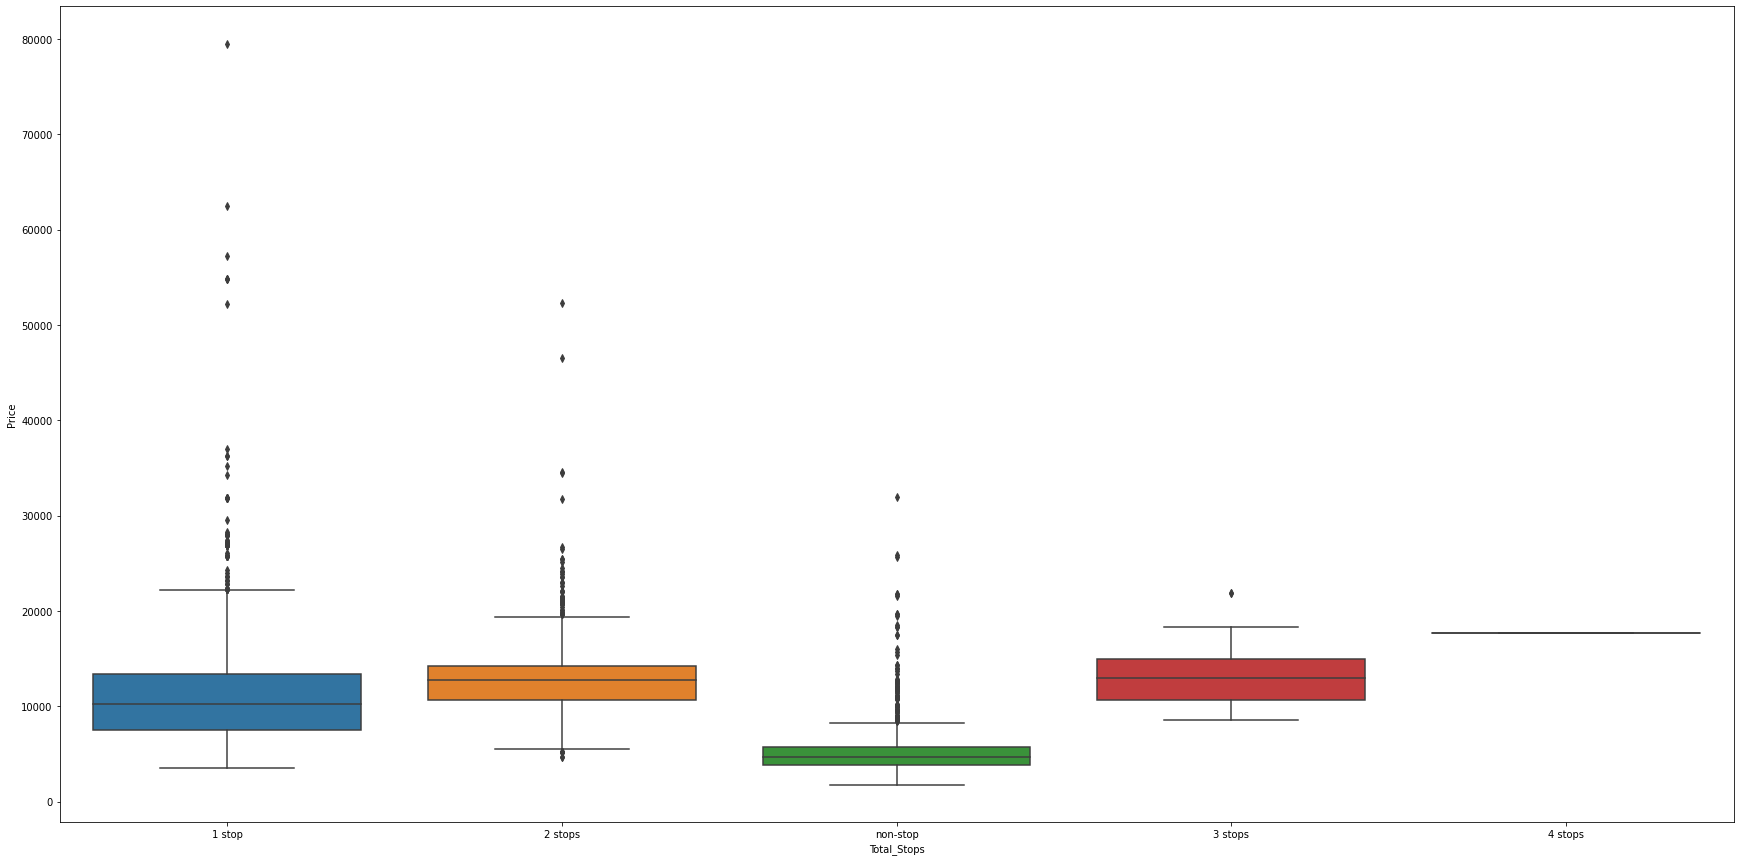

In [26]:
plt.figure(figsize=(30,15))
sns.boxplot(y='Price',x='Total_Stops',data=dt.sort_values('Price',ascending=False))

In [27]:
len(categorical['Airline'].unique())

12

In [28]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'])
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

SOURCE VS PRICE

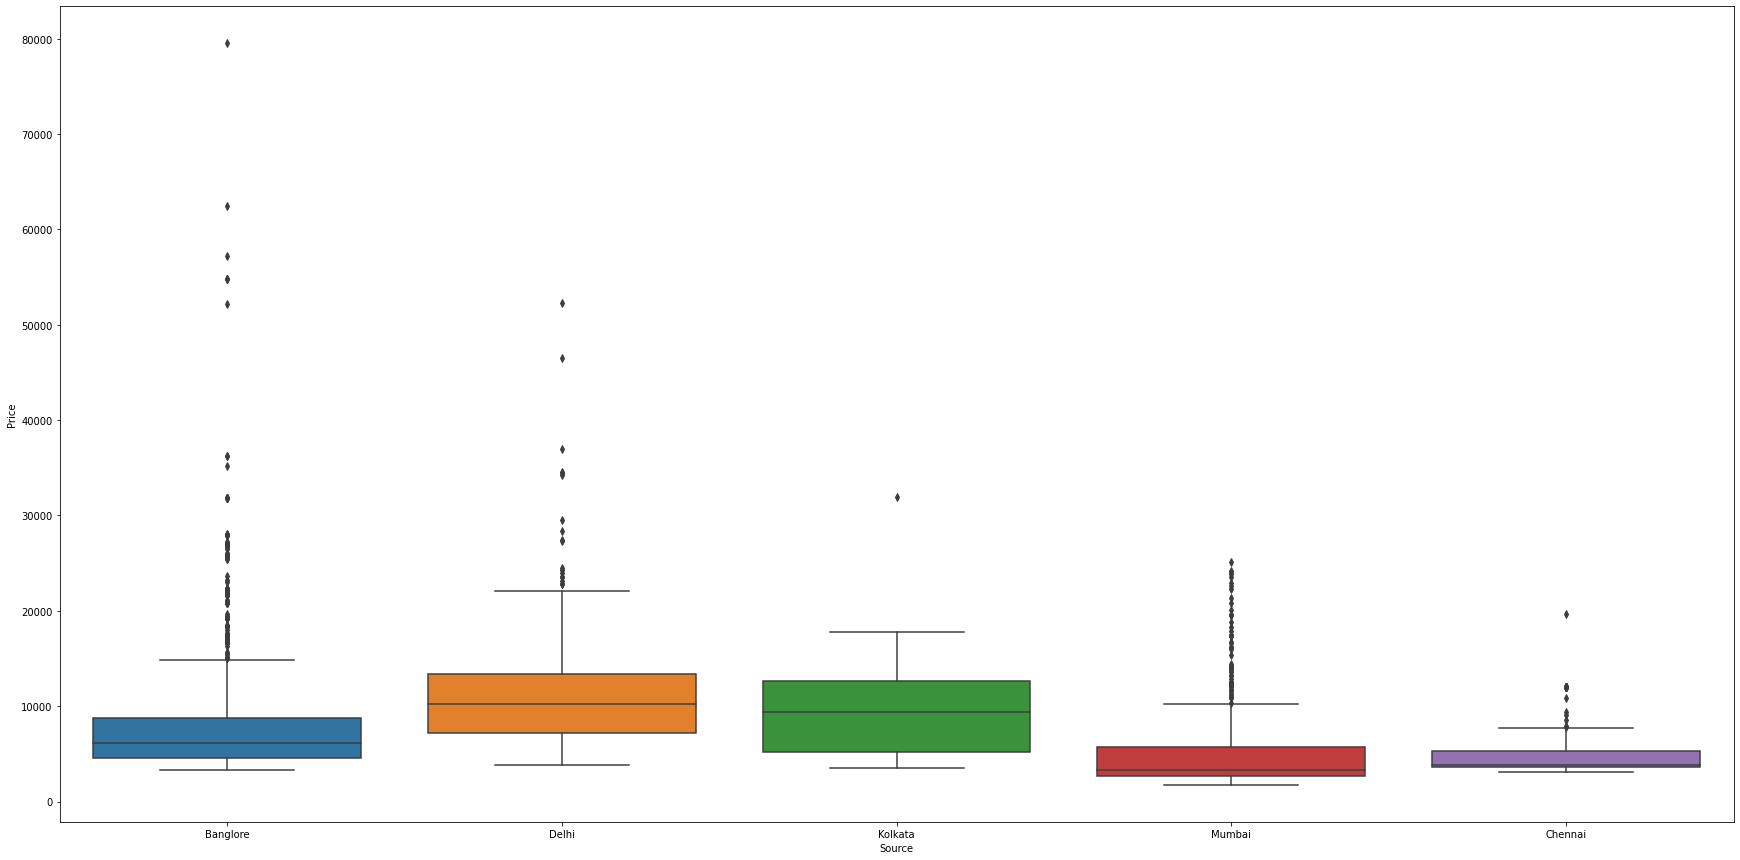

In [30]:
plt.figure(figsize=(30,15))
sns.boxplot(y='Price',x='Source',data=dt.sort_values('Price',ascending=False))

In [31]:
Source=pd.get_dummies(categorical['Source'])
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


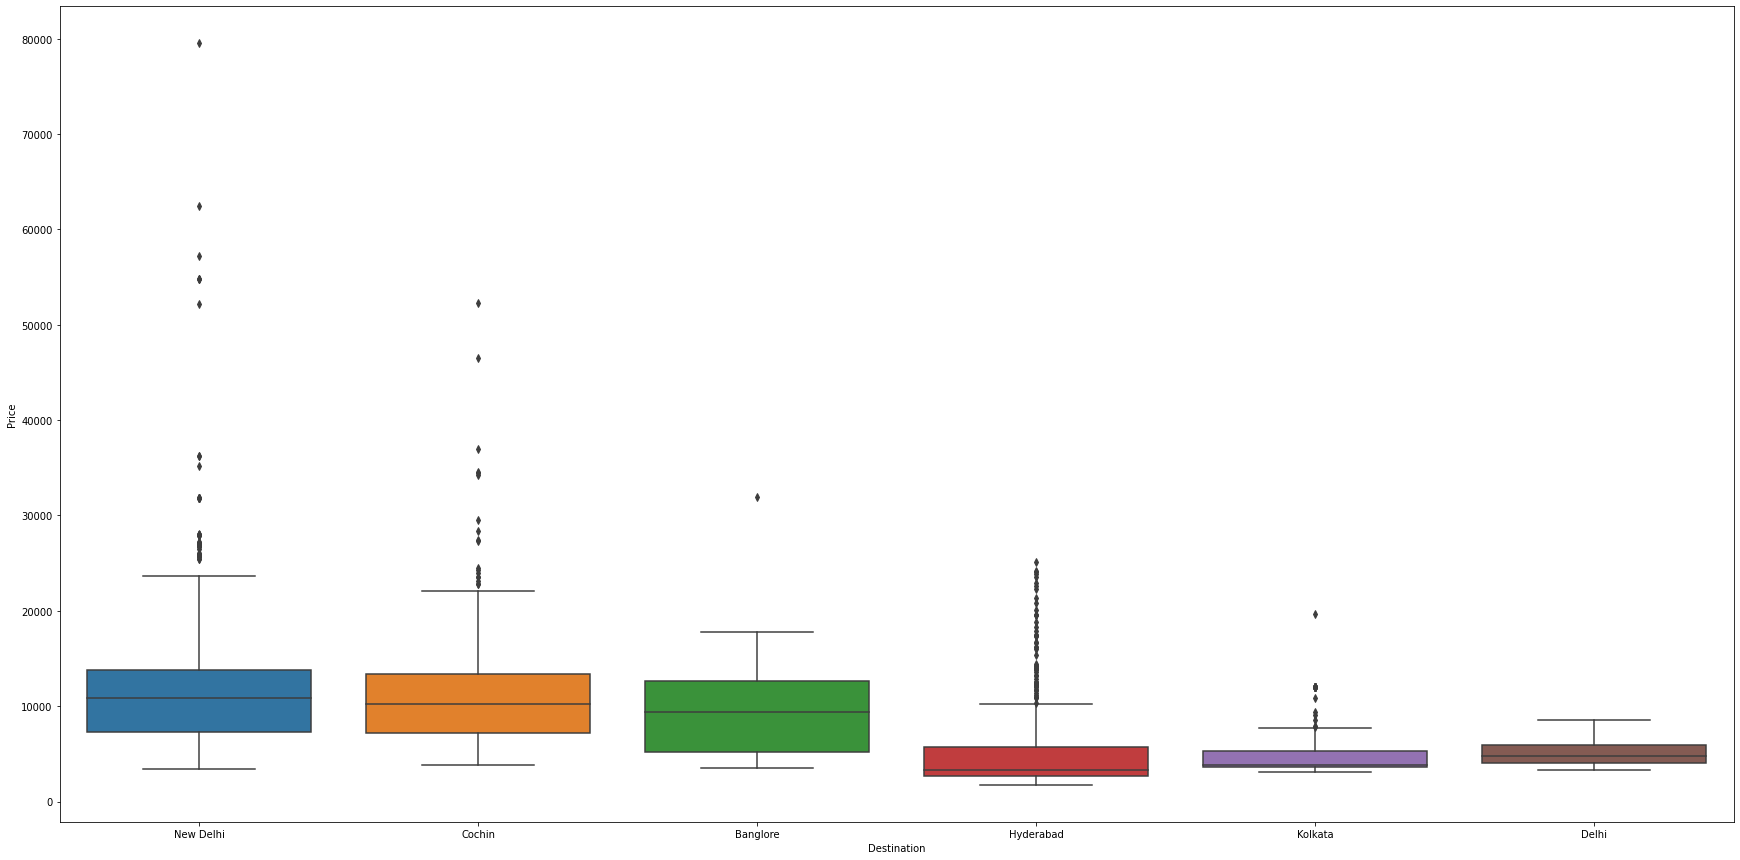

In [32]:
plt.figure(figsize=(30,15))
sns.boxplot(y='Price',x='Destination',data=dt.sort_values('Price',ascending=False))

In [33]:
Destination=pd.get_dummies(categorical['Destination'])
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [34]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [36]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [38]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



**as we see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding**

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [40]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [41]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
categorical=categorical.drop('Route',axis=1)
categorical=categorical.drop('Additional_Info',axis=1)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [42]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [44]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [45]:
dt[cont_col].head()

,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Duration_hours,Duration_mins
0,3897,24,3,2019,22,20,1,10,2,50
1,7662,5,1,2019,5,50,13,15,7,25
2,13882,6,9,2019,9,25,4,25,19,0
3,6218,5,12,2019,18,5,23,30,5,25
4,13302,3,1,2019,16,50,21,35,4,45


In [46]:
dt=pd.concat([categorical,Airline,Source,Destination,dt[cont_col]],axis=1)
dt.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,16,50,21,35,4,45


In [47]:
dt=dt.drop(['Airline','Source','Destination'],axis=1)

In [48]:
dt.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,7662,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,13882,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,6218,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,16,50,21,35,4,45


# **OUTLIER CHECKING**

<Figure size 2160x1440 with 0 Axes>

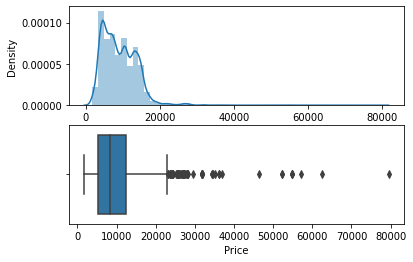

In [49]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
plt.figure(figsize=(30,20))
plot(dt,'Price')

<Figure size 2160x1440 with 0 Axes>

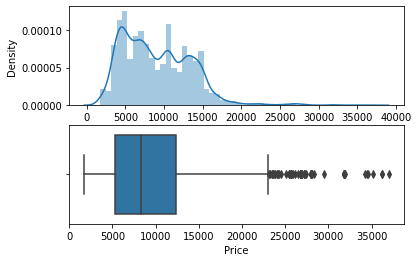

In [50]:
dt['Price']=np.where(dt['Price']>=37000,dt['Price'].median(),dt['Price'])
plt.figure(figsize=(30,20))
plot(dt,'Price')

In [51]:
X=dt.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Journey_year,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Hour,Arrival_Time_Mins,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,2019,16,50,21,35,4,45


In [52]:
Y=dt['Price']
Y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

# **FEATURE SELECTION**
Finding out the best feature which will contribute and have good relation with target variable.

In [54]:
 #Mutual information (MI) [1] between two random variables is a non-negative value, 
 #which measures the dependency between the variables. It is equal to zero if and only 
 #if two random variables are independent, and higher values mean higher dependency.
 from sklearn.feature_selection import mutual_info_classif
 mutual_info_classif(X,Y)

array([2.1121662 , 2.09756036, 2.77177493, 2.28110145, 1.44816302,
       0.73362486, 0.16287463, 0.76329436, 0.09801713, 0.66597522,
       0.91037621, 0.        , 0.56625203, 0.01144325, 0.32240904,
       0.        , 0.2174505 , 0.00662068, 0.68252462, 0.1846102 ,
       1.53479935, 0.87049416, 0.28167592, 0.89168445, 1.52619176,
       0.40305825, 0.29913675, 0.1782834 , 0.3684719 , 1.0878003 ,
       0.84208725, 1.44865958, 1.41106761, 1.21728851, 1.84856292,
       1.51638461, 1.77792938, 1.05729765])

In [55]:
imp=pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.145360
Route_1,2.054741
Route_2,2.787916
Route_3,2.297587
Route_4,1.472496
Route_5,0.669604
Air Asia,0.155695
Air India,0.761196
GoAir,0.092352
IndiGo,0.661336


In [56]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.787916
Route_3,2.297587
Total_Stops,2.145360
Route_1,2.054741
Arrival_Time_Hour,1.834204
Duration_hours,1.800087
Cochin,1.578358
Arrival_Time_Mins,1.546804
Delhi,1.508407
Route_4,1.472496


# **split dataset into train & test**

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [67]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,Y_train)
    print('Training score : {}'.format(model.score(X_train,Y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(Y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(Y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(Y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_prediction)))
    sns.distplot(Y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('/content/sample_data/model.pkl','wb')
        pickle.dump(model,file)

# **ALGORITHMS**

**RANDOM FOREST**

Training score : 0.9548127115253634
predictions are: 
 [13296.925      10191.94666667  4587.03       ... 12067.58
  2439.82       10189.94      ]


r2 score: 0.8030336635716827
MAE: 1190.5081516978316
MSE: 4034901.149396492
RMSE: 2008.70633727195


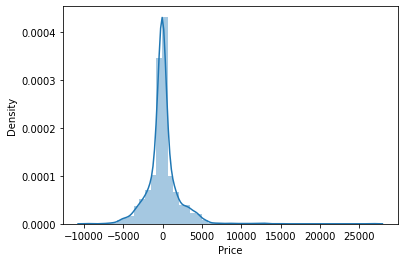

In [68]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1)

**DECISION TREE**

Training score : 0.9678624869240192
predictions are: 
 [13377. 12327.  4145. ... 16172.  2228. 12198.]


r2 score: 0.6869347328843897
MAE: 1400.8550460146623
MSE: 6413214.709817241
RMSE: 2532.432567674259


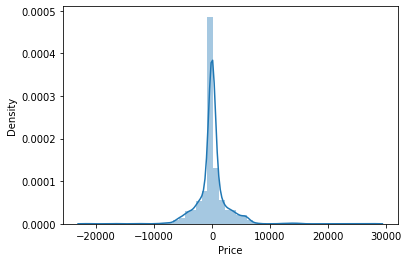

In [69]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),1)

**KNeighbors**

Training score : 0.7897426983704026
predictions are: 
 [12027.2 13523.2  4476.  ...  8562.   2644.8  9952.6]


r2 score: 0.6213560552288873
MAE: 1778.8636406176884
MSE: 7756609.152980816
RMSE: 2785.0689673652278


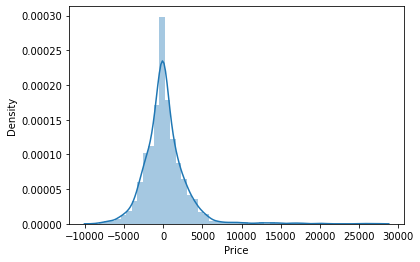

In [70]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor(),1)

**LinearRegression**

Training score : 0.6231885012871891
predictions are: 
 [12021.64695248 10117.48038369  5671.4313186  ...  9484.85733047
  5970.2744052   6785.51226259]


r2 score: 0.586324735264748
MAE: 2008.7351434022767
MSE: 8474233.878867025
RMSE: 2911.053740291825


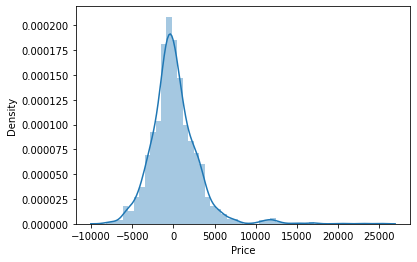

In [71]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression(),1)

# **HYPER PARAMETER TUNING**

In [80]:
import re
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [81]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [83]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [89]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [90]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [91]:
rf_random.best_params_

{'max_depth': 21,
 'max_features': 'auto',
 'min_samples_split': 15,
 'n_estimators': 980}

# **PREDICTION ON TEST DATA**

In [92]:
prediction=rf_random.predict(X_test)

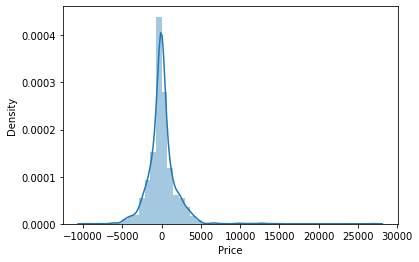

In [94]:
sns.distplot(Y_test-prediction)

In [96]:
metrics.r2_score(Y_test,prediction)

0.8279167881829306

In [97]:
print('MAE',metrics.mean_absolute_error(Y_test,prediction))
print('MSE',metrics.mean_squared_error(Y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE 1141.922653726127
MSE 3525164.562347572
RMSE 1877.542159938778
